<a href="https://colab.research.google.com/github/xup5/Computational-Neuroscience-Class/blob/main/Integrate%20and%20Fire%20Model/Integrate_and_fire_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrate and Fire Model
Odelia Schwartz 2016, Modified by Xu Pan 2023.

Simple version of Integrate and Fire model. 

dV/dt = - V/RC + I/C

Voltage is determined here by directly solving the differential equation.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

deltaT = 1 				# 1 msec time steps
tend = 100

# Define the range of times for the simulation.
times = np.arange(100) 			# 100 msec simulation

# Starting value of the membrane potential
Vstart = 0

Loop through time, updating the membrane potential and adding
spikes whenever the membrane potential crosses the spike
threshold.

In [26]:
I = 10   # current
R = 50   # resistance
C = 6    # capacitance
k = R*C  # time constant
Vthresh = 25 # threshold for spiking
t = 0

# Initialize membrane potential at rest, no spikes
spikes = np.zeros(times.shape)
V = np.zeros(times.shape)

V[0] = Vstart # initialize membrane potential

for i in times:

  # update membrane potential
  V[i] = Vstart*np.exp(-times[t]/k) + R * I * (1 - np.exp(-times[t]/k))
  t = t+1

  # If above spike threshold, generate a spike and reset the
  # membrane potential to Vleak
  if V[i] > Vthresh:
    spikes[i] = 1
    V[i] = Vstart
    t=0

<ipython-input-27-baefbb98d928>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[1].stem(times, spikes)


Text(0, 0.5, 'Neural response')

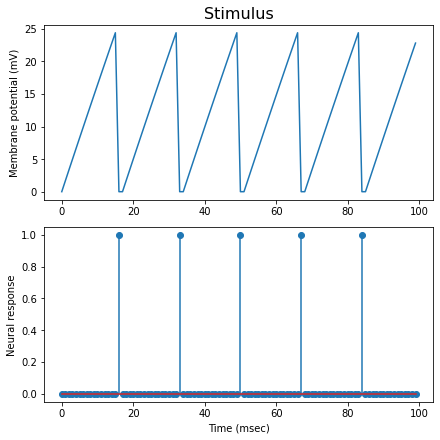

In [27]:
# Plot membrane potential and spike train
fig, axs = plt.subplots(2, constrained_layout=True, figsize=(6, 6))
axs[0].plot(times,V)
axs[0].set_title('Stimulus', fontsize=16)
axs[0].set_ylabel('Membrane potential (mV)')
axs[1].stem(times, spikes)
axs[1].set_xlabel('Time (msec)')
axs[1].set_ylabel('Neural response')


# To do
Try changing the parameters and re-running:

*   Increase I
*   Set I to 0 and Vstart to 20
*   Decrease R
*   Change C